Task 3: Customer Segmentation/Clustering

In [ ]:
import numpy as np
import pandas as pd

customers = pd.read_csv("datasets/customers.csv")
products = pd.read_csv("datasets/products.csv")
transactions = pd.read_csv("datasets/transactions.csv")

merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")

# Step 1: Feature Engineering
# Create customer features
customer_features = merged_data.groupby("CustomerID").agg(
    total_spend=("TotalValue", "sum"),
    avg_order_value=("TotalValue", "mean"),
    favorite_category=("Category", lambda x: x.mode()[0])
).reset_index()

# Merge with customer profile data
customer_features = pd.merge(customer_features, customers, on="CustomerID", suffixes=('_features', '_customers'))

# Encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=["Region", "favorite_category"])

In [3]:
# Step 1: Feature Engineering
# Use the same customer_features as in Task 2
clustering_data = customer_features.drop(columns=["CustomerID", "CustomerName", "SignupDate"])
clustering_data

,total_spend,avg_order_value,Region_Asia,Region_Europe,Region_North America,Region_South America,favorite_category_Books,favorite_category_Clothing,favorite_category_Electronics,favorite_category_Home Decor
0,3354.52,670.904000,False,False,False,True,False,False,True,False
1,1862.74,465.685000,True,False,False,False,False,True,False,False
2,2725.38,681.345000,False,False,False,True,False,False,False,True
3,5354.88,669.360000,False,False,False,True,True,False,False,False
4,2034.24,678.080000,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
195,4982.88,1245.720000,False,True,False,False,False,False,False,True
196,1928.65,642.883333,False,True,False,False,False,False,True,False
197,931.83,465.915000,False,True,False,False,False,True,False,False
198,1979.28,494.820000,False,True,False,False,False,False,True,False


In [4]:
# Step 2: Clustering with K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

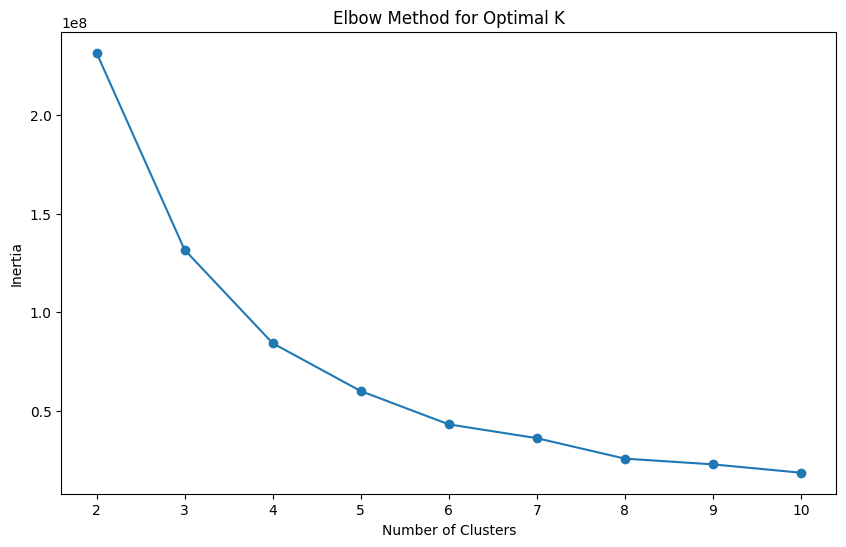

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
# Choose K=4 (elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(clustering_data)

In [7]:
# Step 3: Evaluate Clustering
db_index = davies_bouldin_score(clustering_data, customer_features["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.601705844634399


In [8]:
#Step 4: Visualize Clusters
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(clustering_data)
customer_features["PCA1"] = pca_features[:, 0]
customer_features["PCA2"] = pca_features[:, 1]


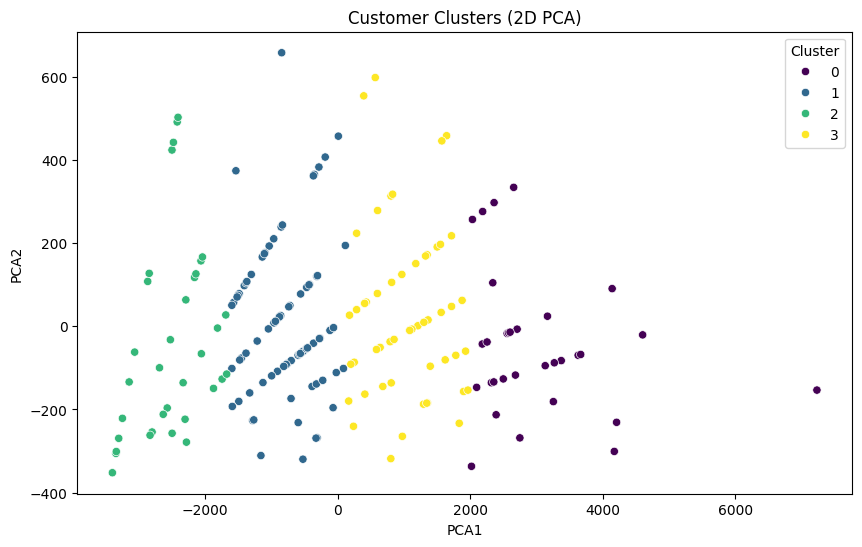

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=customer_features, palette="viridis")
plt.title("Customer Clusters (2D PCA)")
plt.show()

In [11]:
# Step 5: Save Results
customer_features.to_csv("clustering_results_and_analyses/clustering_results.csv", index=False)